<a href="https://colab.research.google.com/github/22f2001443/ideas_internship_notebook/blob/main/notebook_3_globalTemp/Visualizing_Time_Series_Dataset_Global_Temp_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

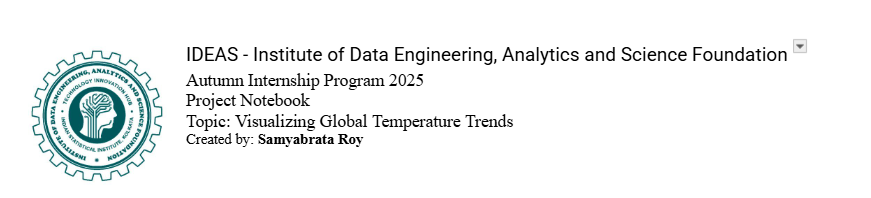

# Notebook: 3

👋 Welcome students!

In this journey, we’re going to take a dataset and slowly uncover the story it tells through visualization. Numbers by themselves can feel cold and endless, but once we turn them into visuals, they begin to speak.


---




---

## 📝 Before We Dive In...

Before we start digging deep into the dataset, let’s pause for a moment and reflect.  
Here are a couple of questions for you to think about (and maybe discuss!):

1. **What do you understand by *Time-Series Data*?**  
   *(Hint: Think about data that is recorded over time — like daily sales data.)*

2. **Do you think choosing Python as our programming language for this analysis is a good decision?**  
   Feel free to share your honest opinion — there’s no right or wrong answer here!  

---

#Introduction



## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the COVID-19 dataset.  


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

---

## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the COVID-19 dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [ ]:
# Replace with your Google Drive file ID which has public view access
# file_id = "1kRogzVjnT_2qcjLd0x8jHFmWsq1Ek9NB"

# # Construct the download URL
# url = f"https://drive.google.com/uc?export=download&id={file_id}"

# try:
#     # Read CSV directly into pandas
#     df_temp = pd.read_csv(url)
#     print(df_temp.head())
# except Exception as e:
#     print("Error loading data:", e)


* To get more info about metadata of the dataset refer to README file in the root of this notebook directory

##Task:

What if the dataset was not available in any only repo or not hosted anywhere? How can you upload a dataset from your local machine? Code it

In [27]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving monthly_csv.csv to monthly_csv (1).csv
User uploaded file "monthly_csv (1).csv" with length 81969 bytes


In [28]:
import pandas as pd
df_temp=pd.read_csv('monthly_csv.csv')



---


## EDA including visualization

### Plot 1:

Monthly Revenue Over Time  

Visualizing monthly avg temparature obtaining from 2 different sources, which will help helps us understand trends across the years.  
Are there peaks during certain months (like due to any particular season)? Let’s find out.

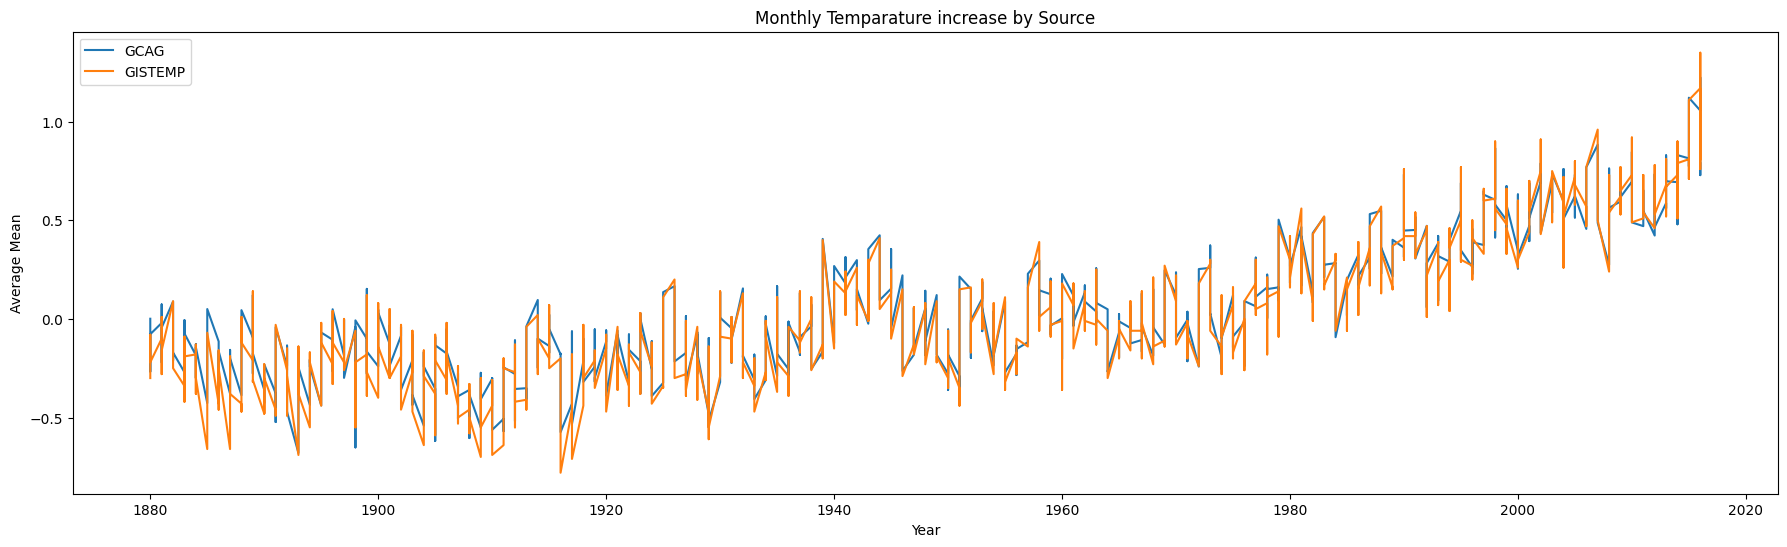

In [29]:

import matplotlib.pyplot as plt

# Convert Date column to datetime
df_temp['Date'] = pd.to_datetime(df_temp['Date'])
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month

# Plot line chart
plt.figure(figsize=(22,6))
for source in df_temp['Source'].unique():
    subset = df_temp[df_temp['Source'] == source]
    plt.plot(subset['Year'], subset['Mean'], label=source)

plt.title("Monthly Temparature increase by Source")
plt.xlabel("Year")
plt.ylabel("Average Mean")
plt.legend()
plt.grid(True, linestyle="--", alpha=0)
plt.show()



---



### Plot 2:

12 Months Moving Average

Smoothing out seasonal fluctuations and short-term variations to reveal the underlying long-term temperature trends. The 12-month moving average provides a clearer view of climate patterns by averaging each month with the 11 months surrounding it, making it easier to identify gradual warming or cooling trends over the years.

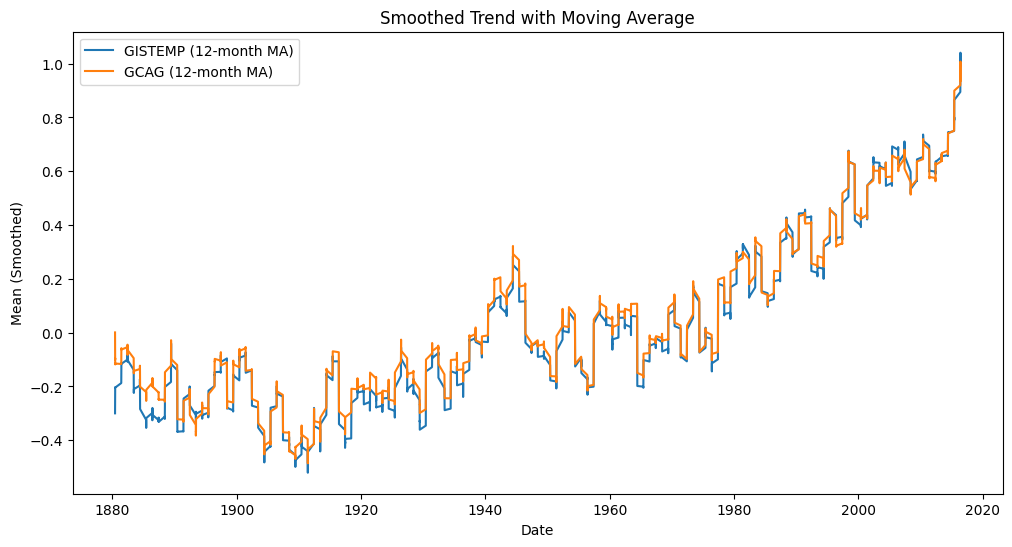

In [30]:
# Sort data by Date
df_temp = df_temp.sort_values(by="Date")

# Calculate moving average (e.g., 12-month window)
df_temp['Moving_Avg'] = df_temp.groupby('Source')['Mean'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())

# Plot moving average
plt.figure(figsize=(12,6))
for source in df_temp['Source'].unique():
    subset = df_temp[df_temp['Source'] == source]
    plt.plot(subset['Date'], subset['Moving_Avg'], label=f"{source} (12-month MA)")

plt.title("Smoothed Trend with Moving Average")
plt.xlabel("Date")
plt.ylabel("Mean (Smoothed)")
plt.legend()
plt.show()


Q. How would you interpet this?

This trend line smoothed out the short-run volatility of season to reveal the undeniable  long-run story: global temperatures were fairly constant for almost a full century before taking off on a sustained and precipitous upward climb about the 1970s-1980s. The observation that two separate agencies (NASA and NOAA) produce almost identical curves underscores the strength of this result, affirming the planet has warmed more than 1.0°C above its pre-industrial reference point. This sharp increase exactly matches the historical growth in greenhouse gas emissions due to human activities, and in visual form confirms unequivocally human-induced climate change.

Construct another line plot by taking any one of the souces in count and try to smooth-out the variation more and try to come up with a trend

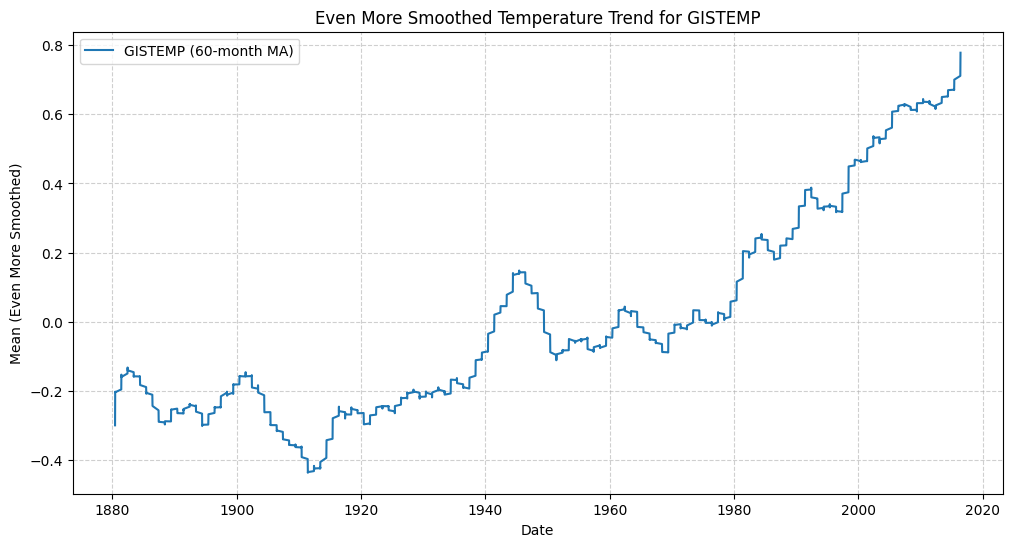

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
df_temp.head()
source_to_plot = 'GISTEMP'
df_subset = df_temp[df_temp['Source'] == source_to_plot].copy()

df_subset['Moving_Avg_Smoothed'] = df_subset['Mean'].rolling(window=60, min_periods=1).mean()
plt.figure(figsize=(12, 6))
plt.plot(df_subset['Date'], df_subset['Moving_Avg_Smoothed'], label=f"{source_to_plot} (60-month MA)")

plt.title(f"Even More Smoothed Temperature Trend for {source_to_plot}")
plt.xlabel("Date")
plt.ylabel("Mean (Even More Smoothed)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()





---


### Plot 3

Seasonal Temperature Heatmap (Last 50 Years)

A comprehensive heatmap displaying temperature variations across months and years over the past five decades. This visualization reveals seasonal patterns, climate shifts, and anomalies by showing how temperatures have changed month-by-month across different years. Warmer periods appear as lighter/warmer colors while cooler periods show as darker/cooler colors, making it easy to spot seasonal consistency, unusual weather events, and long-term climate trends.

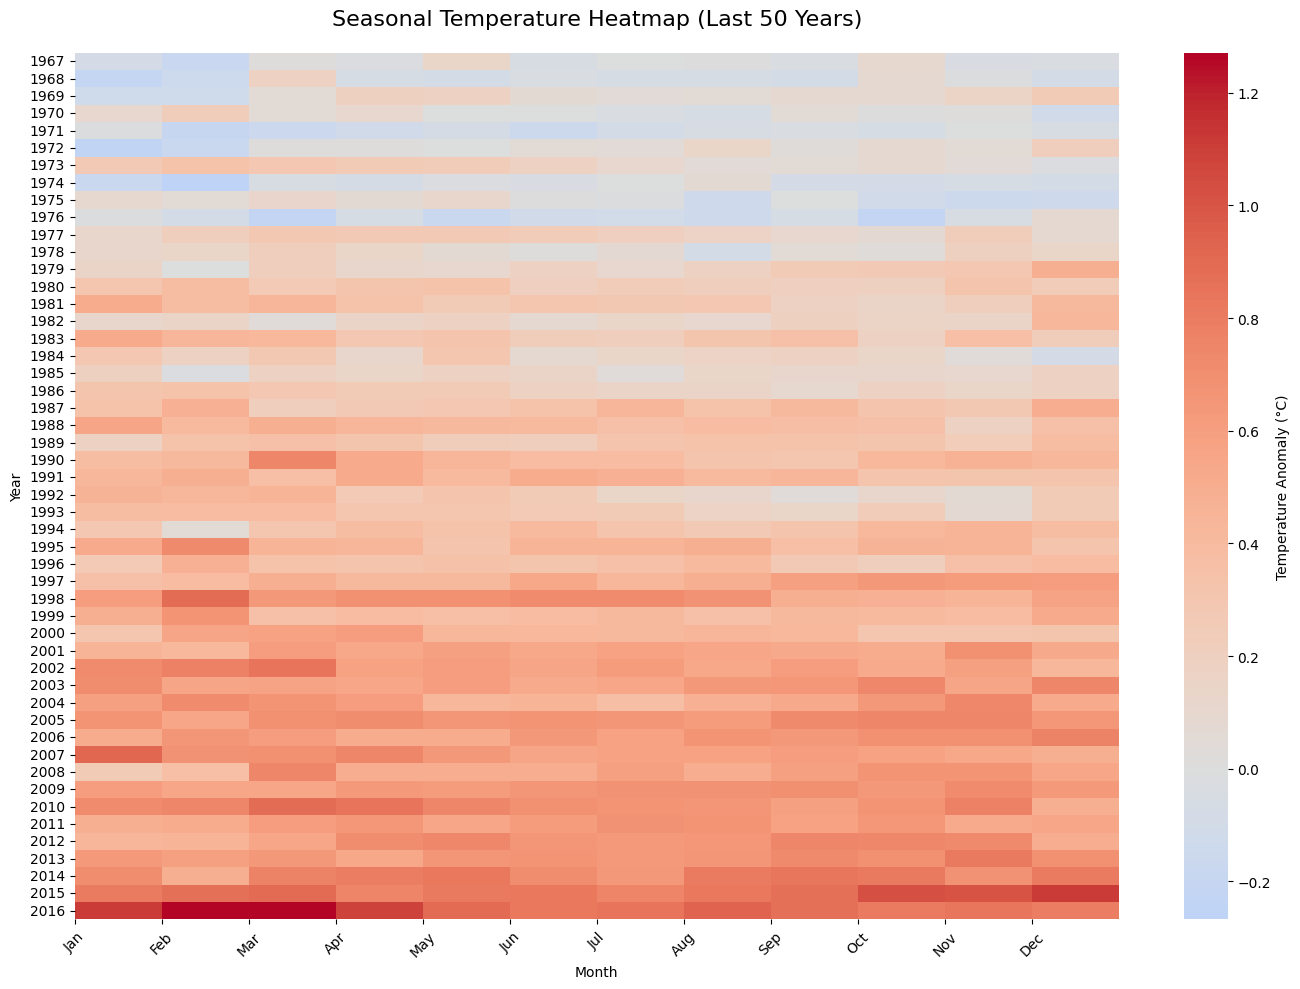

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df =pd.read_csv('monthly_csv.csv')
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


last50 = df[df['Year'] >= (df['Year'].max() - 49)]


seasonal_data = last50.groupby(['Year','Month'])['Mean'].mean().reset_index()

heatmap_data = seasonal_data.pivot(index='Year', columns='Month', values='Mean')


heatmap_data = heatmap_data.reindex(columns=range(1,13))

plt.figure(figsize=(14,10))
sns.heatmap(
    heatmap_data,
    cmap="coolwarm",
    center=0,
    cbar_kws={'label': 'Temperature Anomaly (°C)'}
)

plt.title("Seasonal Temperature Heatmap (Last 50 Years)", fontsize=16, pad=20)
plt.xlabel("Month")
plt.ylabel("Year")

plt.xticks(ticks=range(0,12), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], rotation=45)

plt.tight_layout()
plt.show()


Q. How about we try to visualize last 20 years rather? Construct the plot

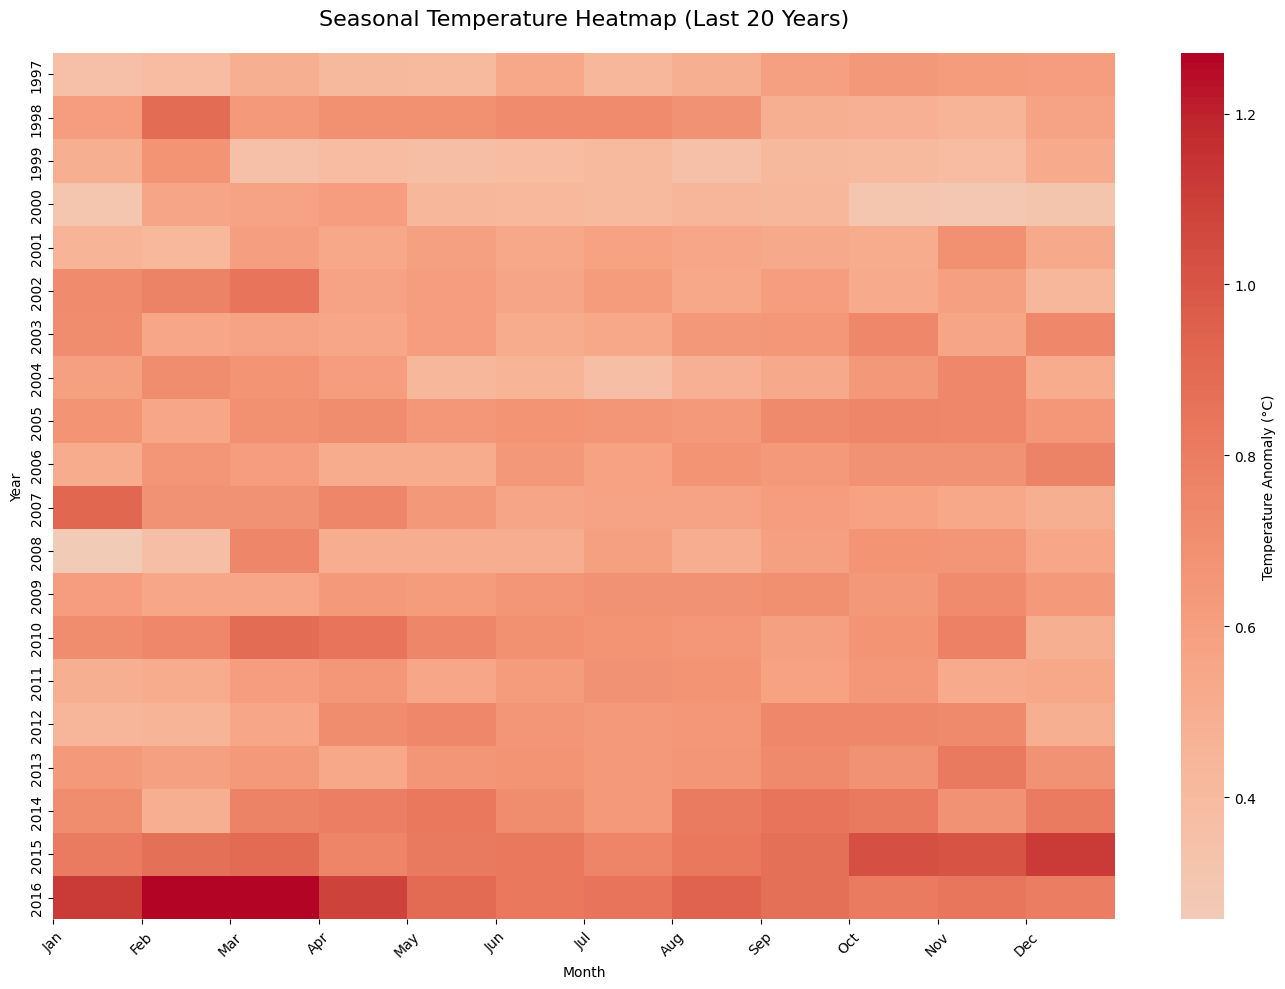

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df =pd.read_csv('monthly_csv.csv')
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


last20 = df[df['Year'] >= (df['Year'].max() - 19)]


seasonal_data = last20.groupby(['Year','Month'])['Mean'].mean().reset_index()

heatmap_data = seasonal_data.pivot(index='Year', columns='Month', values='Mean')


heatmap_data = heatmap_data.reindex(columns=range(1,13))

plt.figure(figsize=(14,10))
sns.heatmap(
    heatmap_data,
    cmap="coolwarm",
    center=0,
    cbar_kws={'label': 'Temperature Anomaly (°C)'}
)

plt.title("Seasonal Temperature Heatmap (Last 20 Years)", fontsize=16, pad=20)
plt.xlabel("Month")
plt.ylabel("Year")

plt.xticks(ticks=range(0,12), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], rotation=45)

plt.tight_layout()
plt.show()




---

Task:

What type of charts could have served the same purpose done in plot 3? Plot any one of them (apart from heatmap) and visualize seasonal variation

<Figure size 1600x800 with 0 Axes>

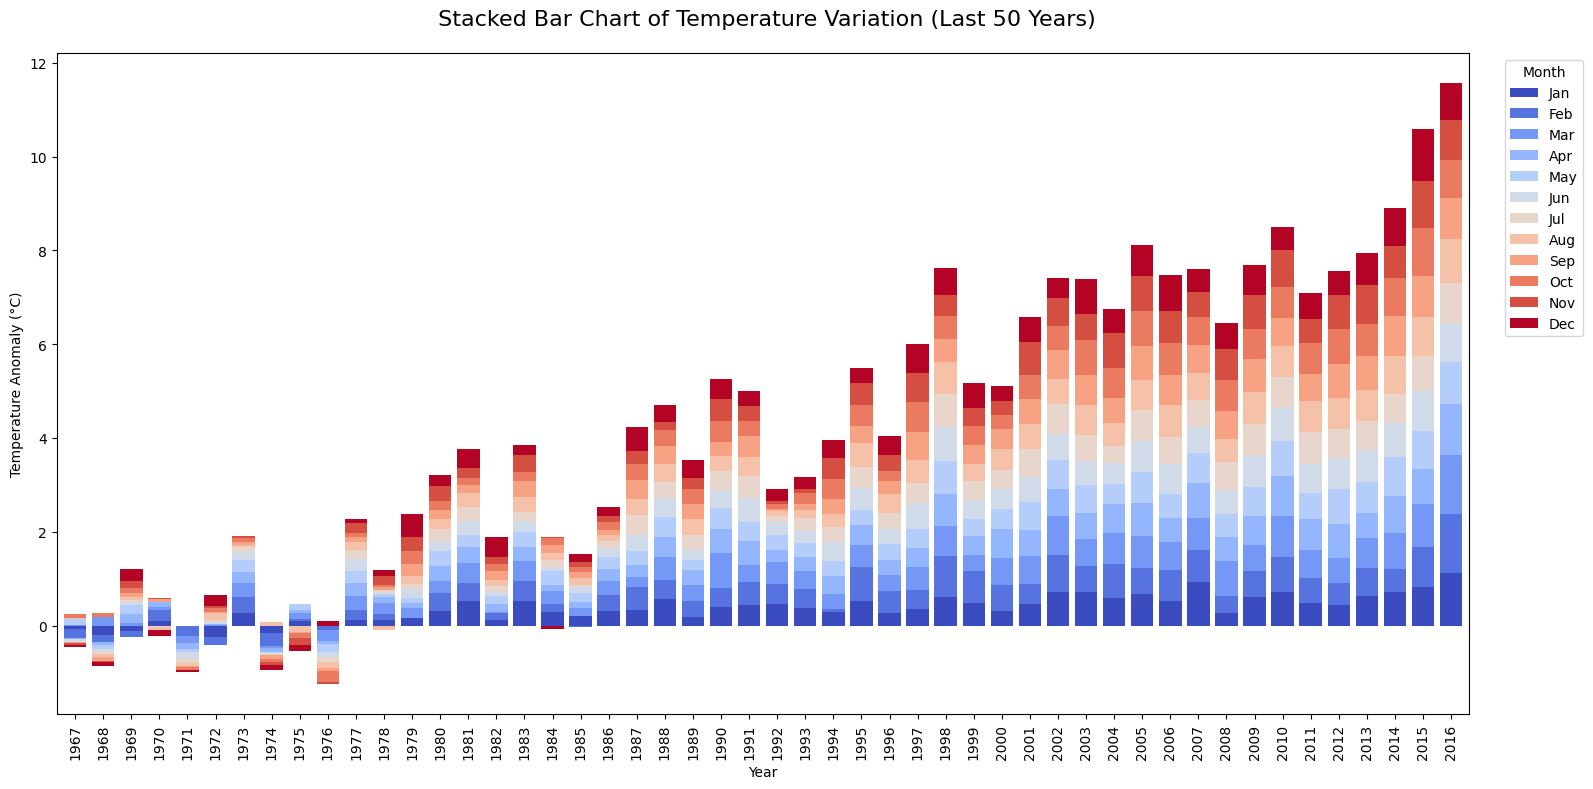

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

last50 = df[df['Year'] >= (df['Year'].max() - 49)]
seasonal_data = last50.groupby(['Year','Month'])['Mean'].mean().reset_index()

bar_data = seasonal_data.pivot(index='Year', columns='Month', values='Mean')
bar_data = bar_data.reindex(columns=range(1,13))


plt.figure(figsize=(16,8))

bar_data.plot(
    kind='bar',
    stacked=True,
    colormap='coolwarm',
    figsize=(16,8),
    width=0.8
)

plt.title(" Stacked Bar Chart of Temperature Variation (Last 50 Years)", fontsize=16, pad=20)
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend(
    title="Month",
    labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()




---



### Assignment:

Find a similar dataset from any public repository or constrt a synthetic data from `www.syngendata.ai` and perform similart analysis to draw inference

In [35]:
from google.colab import files

uploaded = files.upload()








Saving synthetic_monthly_temperatures_corrected.csv to synthetic_monthly_temperatures_corrected (1).csv


In [36]:
import pandas as pd

df_synth = pd.read_csv("synthetic_monthly_temperatures_corrected.csv", parse_dates=["Date"])
print(df_synth.info())
print(df_synth.head())
print(df_synth["Source"].unique())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Source  2424 non-null   object        
 1   Date    2424 non-null   datetime64[ns]
 2   Mean    2424 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 56.9+ KB
None
    Source       Date    Mean
0     GCAG 1924-06-01 -0.1275
1  GISTEMP 1924-06-01 -0.2157
2     GCAG 1924-06-02 -0.1255
3  GISTEMP 1924-06-02 -0.2207
4     GCAG 1924-06-03 -0.1017
['GCAG' 'GISTEMP']


Plot 1:

Visualizing monthly avg temparature obtaining from 2 different sources

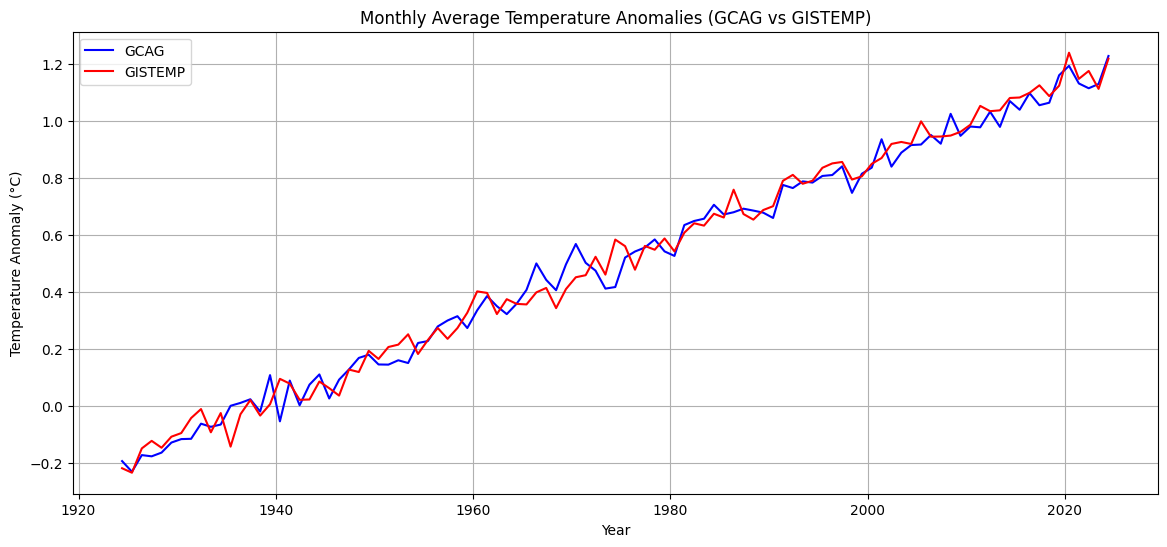

In [37]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("synthetic_monthly_temperatures_corrected.csv")

df["Date"] = pd.to_datetime(df["Date"])

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month


monthly_avg = df.groupby(["Year", "Month", "Source"])["Mean"].mean().reset_index()

pivot_df = monthly_avg.pivot_table(index=["Year", "Month"], columns="Source", values="Mean")


pivot_df.index = pd.to_datetime(
    pivot_df.index.get_level_values("Year").astype(str) + "-" +
    pivot_df.index.get_level_values("Month").astype(str) + "-01"
)


plt.figure(figsize=(14,6))
plt.plot(pivot_df.index, pivot_df["GCAG"], label="GCAG", color="blue")
plt.plot(pivot_df.index, pivot_df["GISTEMP"], label="GISTEMP", color="red")

plt.title("Monthly Average Temperature Anomalies (GCAG vs GISTEMP)")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.grid(True)
plt.show()







Plot 2:
12 Months Moving Average

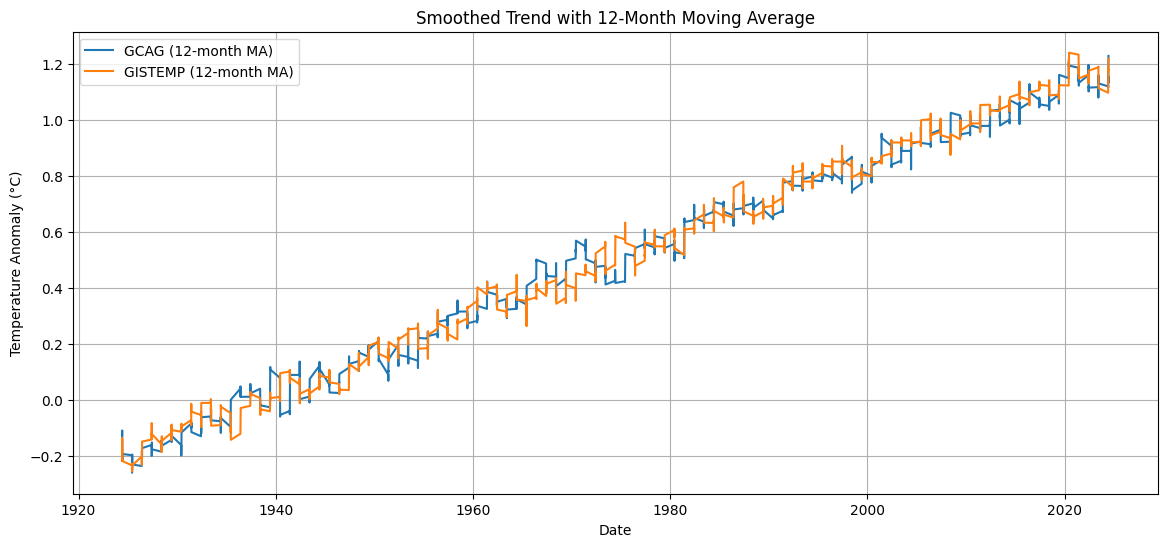

In [38]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("synthetic_monthly_temperatures_corrected.csv")

df.columns = df.columns.str.strip()


df["Date"] = pd.to_datetime(df["Date"])

df = df.sort_values(by=["Source", "Date"])


df["Smoothed"] = df.groupby("Source")["Mean"].transform(lambda x: x.rolling(window=12, min_periods=1).mean())


plt.figure(figsize=(14,6))

for source in df["Source"].unique():
    subset = df[df["Source"] == source]
    plt.plot(subset["Date"], subset["Smoothed"], label=f"{source} (12-month MA)")

plt.title("Smoothed Trend with 12-Month Moving Average")
plt.xlabel("Date")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.grid(True)
plt.show()


interpretation

The graph, showing global temperature anomalies from 1924 to 2024 using GCAG and GISTEMP data, clearly indicates a consistent and accelerating global warming trend over the past century.The independent datasets demonstrate remarkable agreement, lending strong support to the observed warming. By 2024, temperatures consistently show anomalies over 1.0°C above baseline, highlighting significant warming.

Constructing another line plot by taking "GISTEMP" souces in count and try to smooth-out the variation more and try to come up with a trend

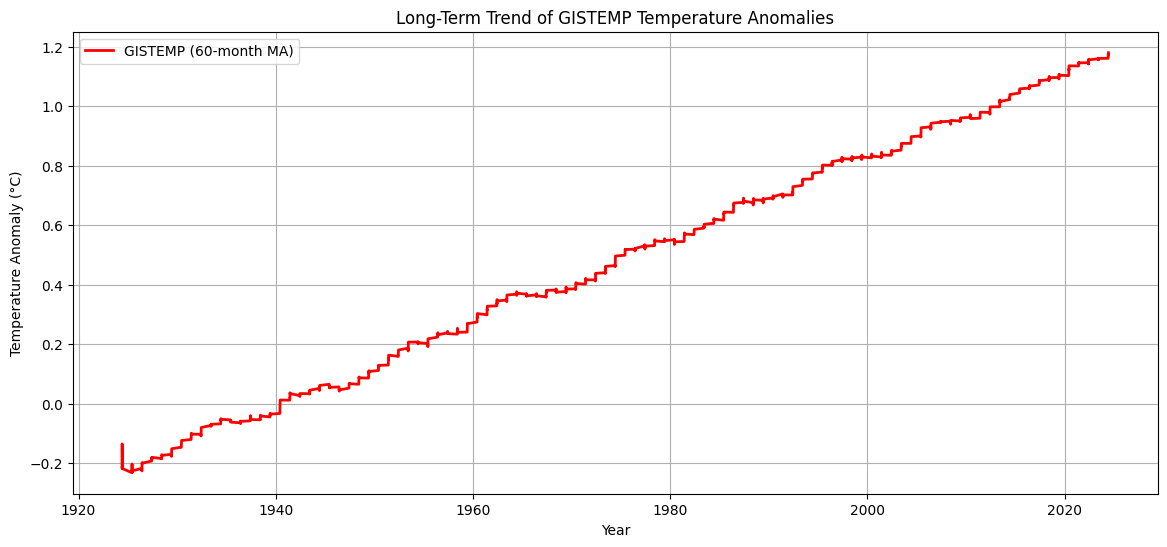

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("synthetic_monthly_temperatures_corrected.csv")


df.columns = df.columns.str.strip()

df["Date"] = pd.to_datetime(df["Date"])


gistemp_df = df[df["Source"] == "GISTEMP"].sort_values("Date")


gistemp_df["Smoothed"] = gistemp_df["Mean"].rolling(window=60, min_periods=1).mean()


plt.figure(figsize=(14,6))
plt.plot(gistemp_df["Date"], gistemp_df["Smoothed"], color="red", linewidth=2, label="GISTEMP (60-month MA)")

plt.title("Long-Term Trend of GISTEMP Temperature Anomalies")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.grid(True)
plt.show()



Plot 3
Seasonal Temperature Heatmap (Last 50 Years)

A comprehensive heatmap displaying temperature variations across months and years over the past five decades. This visualization reveals seasonal patterns, climate shifts, and anomalies by showing how temperatures have changed month-by-month across different years. Warmer periods appear as lighter/warmer colors while cooler periods show as darker/cooler colors, making it easy to spot seasonal consistency, unusual weather events, and long-term climate trends.

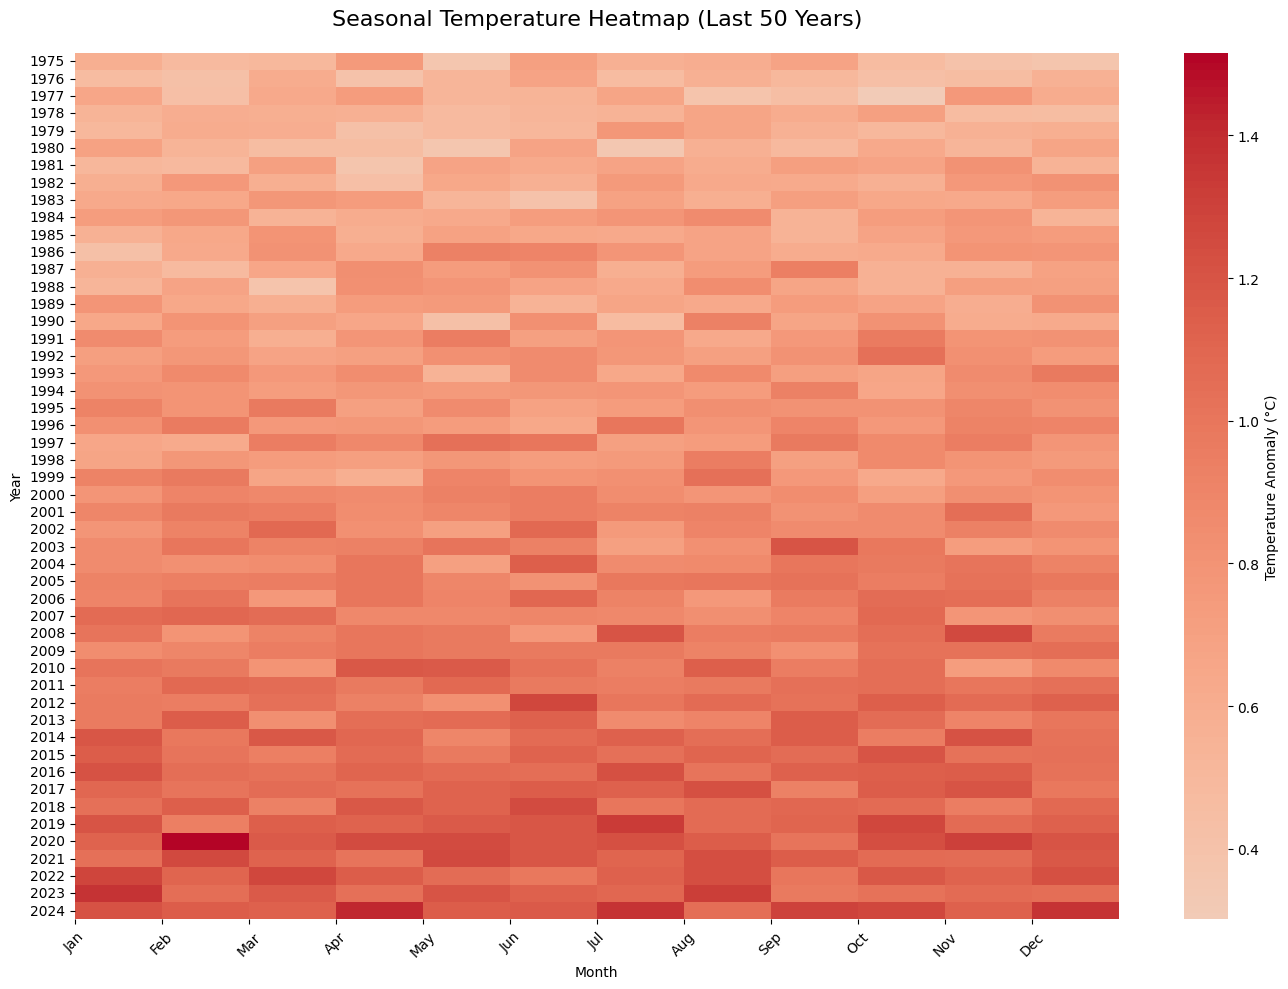

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("synthetic_monthly_temperatures_corrected.csv")

df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


last50 = df[df['Year'] >= (df['Year'].max() - 49)]


seasonal_data = last50.groupby(['Year','Month'])['Mean'].mean().reset_index()

heatmap_data = seasonal_data.pivot(index='Year', columns='Month', values='Mean')


heatmap_data = heatmap_data.reindex(columns=range(1,13))

plt.figure(figsize=(14,10))
sns.heatmap(
    heatmap_data,
    cmap="coolwarm",
    center=0,
    cbar_kws={'label': 'Temperature Anomaly (°C)'}
)

plt.title("Seasonal Temperature Heatmap (Last 50 Years)", fontsize=16, pad=20)
plt.xlabel("Month")
plt.ylabel("Year")

plt.xticks(ticks=range(0,12), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], rotation=45)

plt.tight_layout()
plt.show()




Visualising last 20 year trend

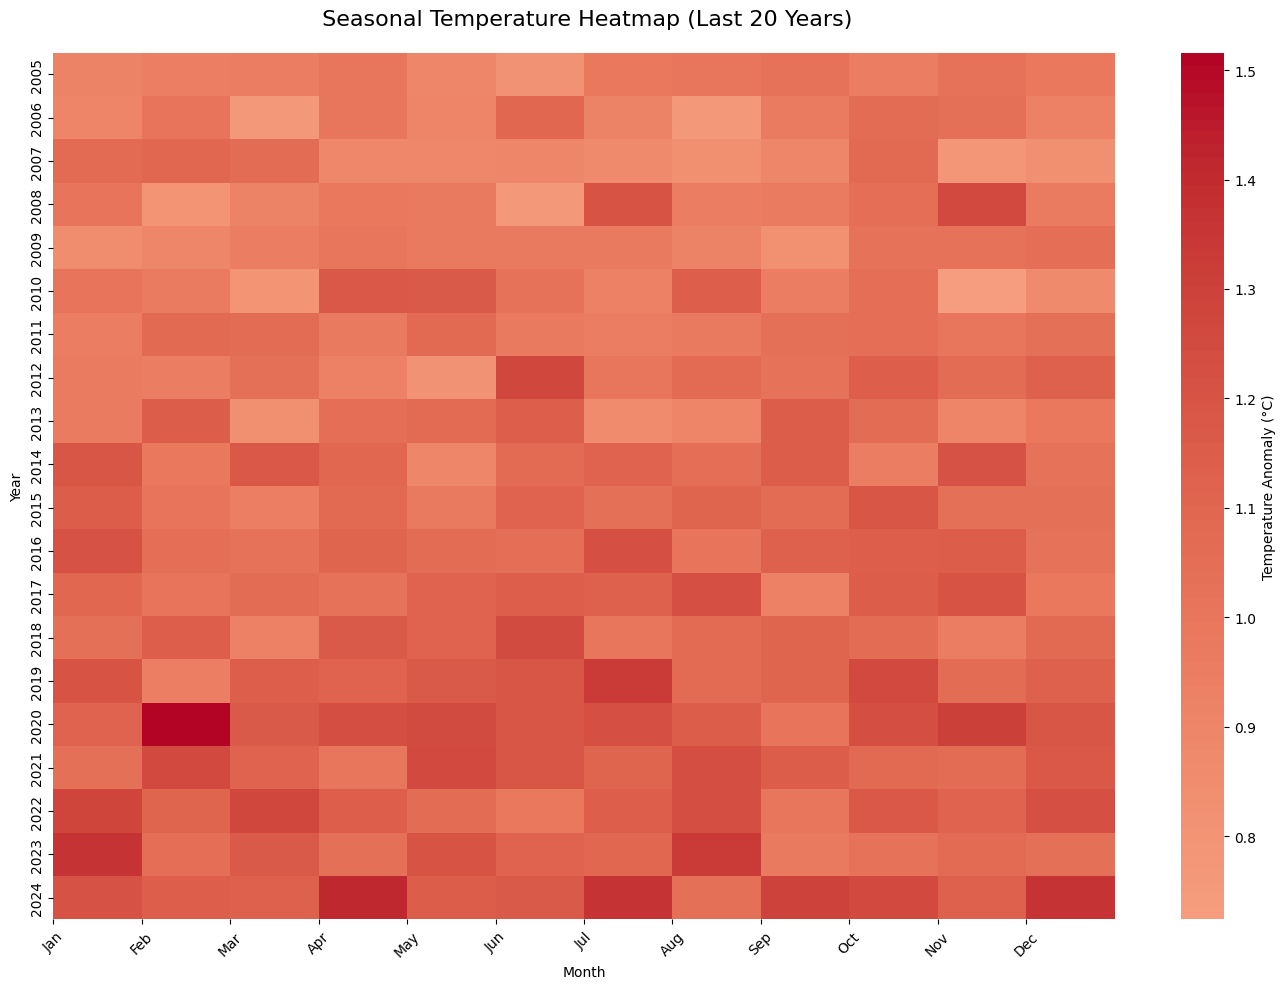

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("synthetic_monthly_temperatures_corrected.csv")

df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

last20 = df[df['Year'] >= (df['Year'].max() - 19)]


seasonal_data = last20.groupby(['Year','Month'])['Mean'].mean().reset_index()


heatmap_data = seasonal_data.pivot(index='Year', columns='Month', values='Mean')

heatmap_data = heatmap_data.reindex(columns=range(1,13))


plt.figure(figsize=(14,10))
sns.heatmap(
    heatmap_data,
    cmap="coolwarm",
    center=0,
    cbar_kws={'label': 'Temperature Anomaly (°C)'}
)

plt.title(" Seasonal Temperature Heatmap (Last 20 Years)", fontsize=16, pad=20)
plt.xlabel("Month")
plt.ylabel("Year")


plt.xticks(
    ticks=range(0,12),
    labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],
    rotation=45
)

plt.tight_layout()
plt.show()


Stacked Bar Chart

<Figure size 1600x800 with 0 Axes>

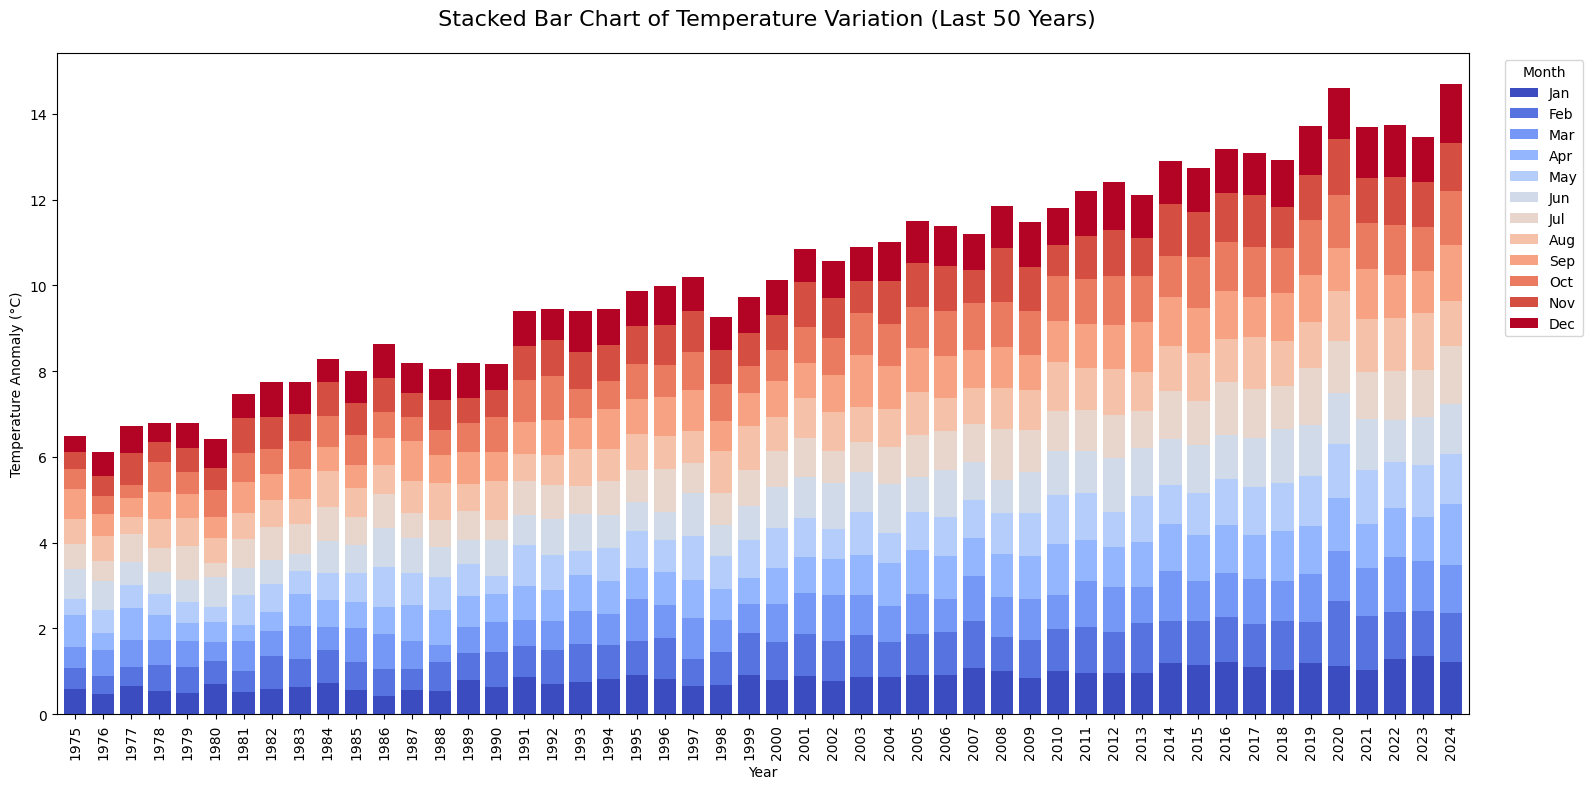

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("synthetic_monthly_temperatures_corrected.csv")

df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


last50 = df[df['Year'] >= (df['Year'].max() - 49)]


seasonal_data = last50.groupby(['Year','Month'])['Mean'].mean().reset_index()

bar_data = seasonal_data.pivot(index='Year', columns='Month', values='Mean')
bar_data = bar_data.reindex(columns=range(1,13))


plt.figure(figsize=(16,8))

bar_data.plot(
    kind='bar',
    stacked=True,
    colormap='coolwarm',
    figsize=(16,8),
    width=0.8
)

plt.title(" Stacked Bar Chart of Temperature Variation (Last 50 Years)", fontsize=16, pad=20)
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend(
    title="Month",
    labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()
